## Importing packages


In [2]:
from plotting import plot_no_numbers, plot_plate, run_plotting_pipeline
from models import GrowthCurveConfig, PlotConfig, Experiment

# Plotting from raw data without plate_layout.json

If you do not want to create a plate_layout.json, creating plots is still possible but might be a little more effort.


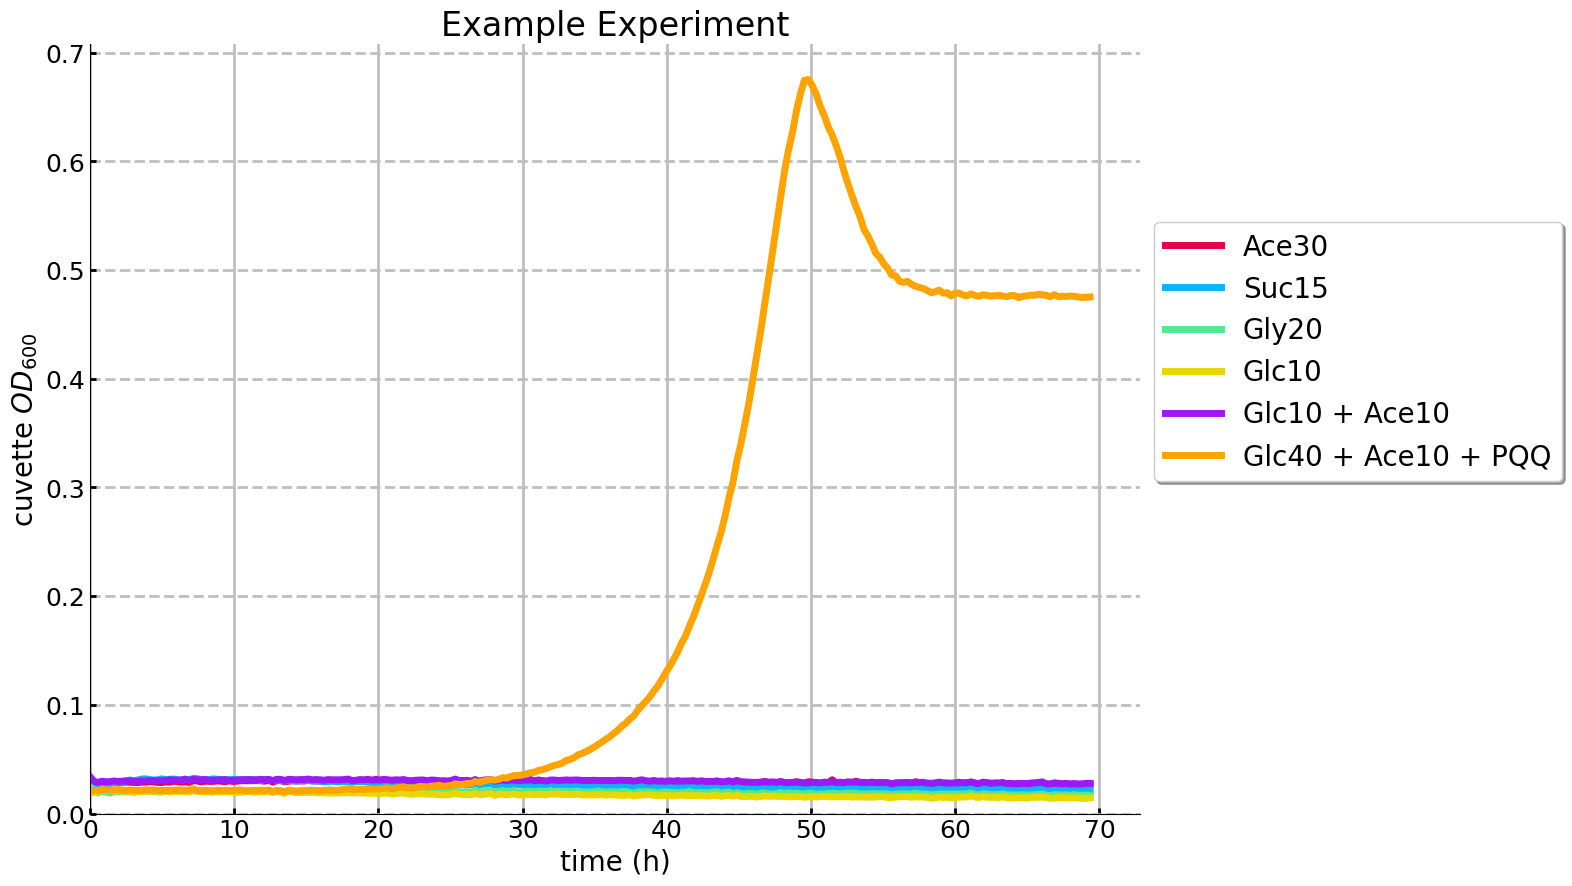

In [3]:
"""
First, create an array of the growth curves that you want to plot. 
Each entry of GrowthCurveConfig in the array below corresponds to one growth curve.

The measurement_series field is an array that contains the names of the wells from your raw data excel sheet.

The aggregation_func field specifies how the data from the measurement_series should be aggregated. 
E.g. if you have two replicates for each condition, you can set aggregation_func to "mean" to plot the mean of the two replicates.

The condition field specifies the condition of the growth curve and will be shown in the legend of the plot.
"""

configs_MiniKat_without_IPTG = [
    GrowthCurveConfig(
        measurement_series=[
            "A1",
            "A2",
        ],
        aggregation_func="mean",
        condition="Ace30",
    ),
    GrowthCurveConfig(
        measurement_series=[
            "A3",
            "A4",
        ],
        aggregation_func="mean",
        condition="Suc15",
    ),
    GrowthCurveConfig(
        measurement_series=[
            "A5",
            "A6",
        ],
        aggregation_func="mean",
        condition="Gly20",
    ),
    GrowthCurveConfig(
        measurement_series=[
            "A7",
            "A8",
        ],
        aggregation_func="mean",
        condition="Glc10",
    ),
    GrowthCurveConfig(
        measurement_series=[
            "A9",
            "A10",
        ],
        aggregation_func="mean",
        condition="Glc10 + Ace10",
    ),
    GrowthCurveConfig(
        measurement_series=[
            "A11",
            "A12",
        ],
        aggregation_func="mean",
        condition="Glc40 + Ace10 + PQQ",
    ),
]

# Specify which data to plot and where the data comes from
experiment = Experiment(
    title="Example Experiment",
    path_to_raw_data="data/example.xlsx",
    sheet_name="Sheet1",
    growth_curve_configs=configs_MiniKat_without_IPTG,
    measurement_period=10,
    OD_growth_threshold=0.05,
)

# Specfiy how the plot is supposed to look
plot_config = PlotConfig(
    y_scale="linear",
    x_max=None,
    y_max=None,
    save_plot_as="png",
    is_mean_plot=True,
)

# Plot the growth curves
plot_no_numbers(
    experiment=experiment,
    plot_config=plot_config,
    path_to_plot_img=f"plot",
)

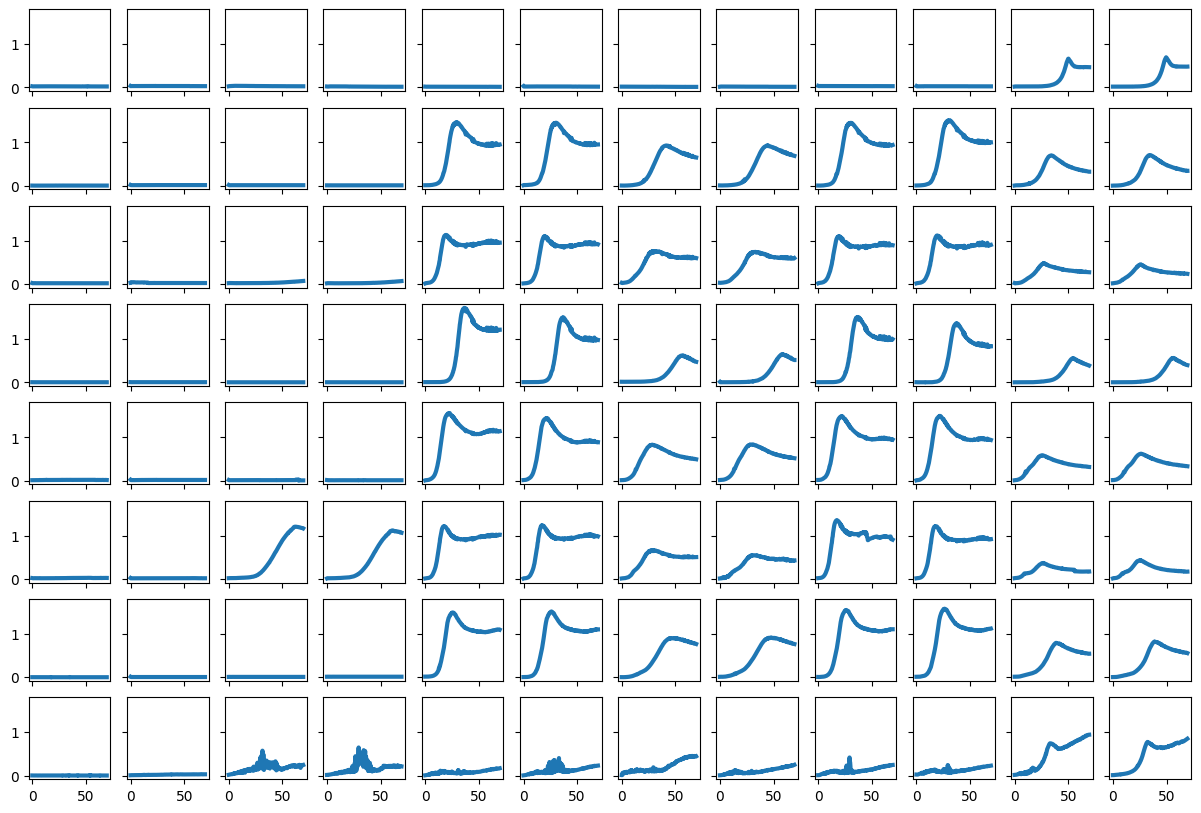

In [4]:
# # %%
# # view the whole plate, change nwells if not 96-well plate
plot_plate(experiment.adjusted_growth_data, well_count=96)

# Plot growth curves with the help of a plate_layout.json

The plate_layout.json is used to identify which well contains which strains, conditions and media. Given this information, the function is able to generate plots for as many of the specified strains, and conditions/media.

The groupby field allows to specify by which attribute (e.g. strain/condition/media) the data is aggregated. For example, if it's grouped by condition, all strains, media and replicates are averaged into a single growth curve for a specific condition.


<Figure size 640x480 with 0 Axes>

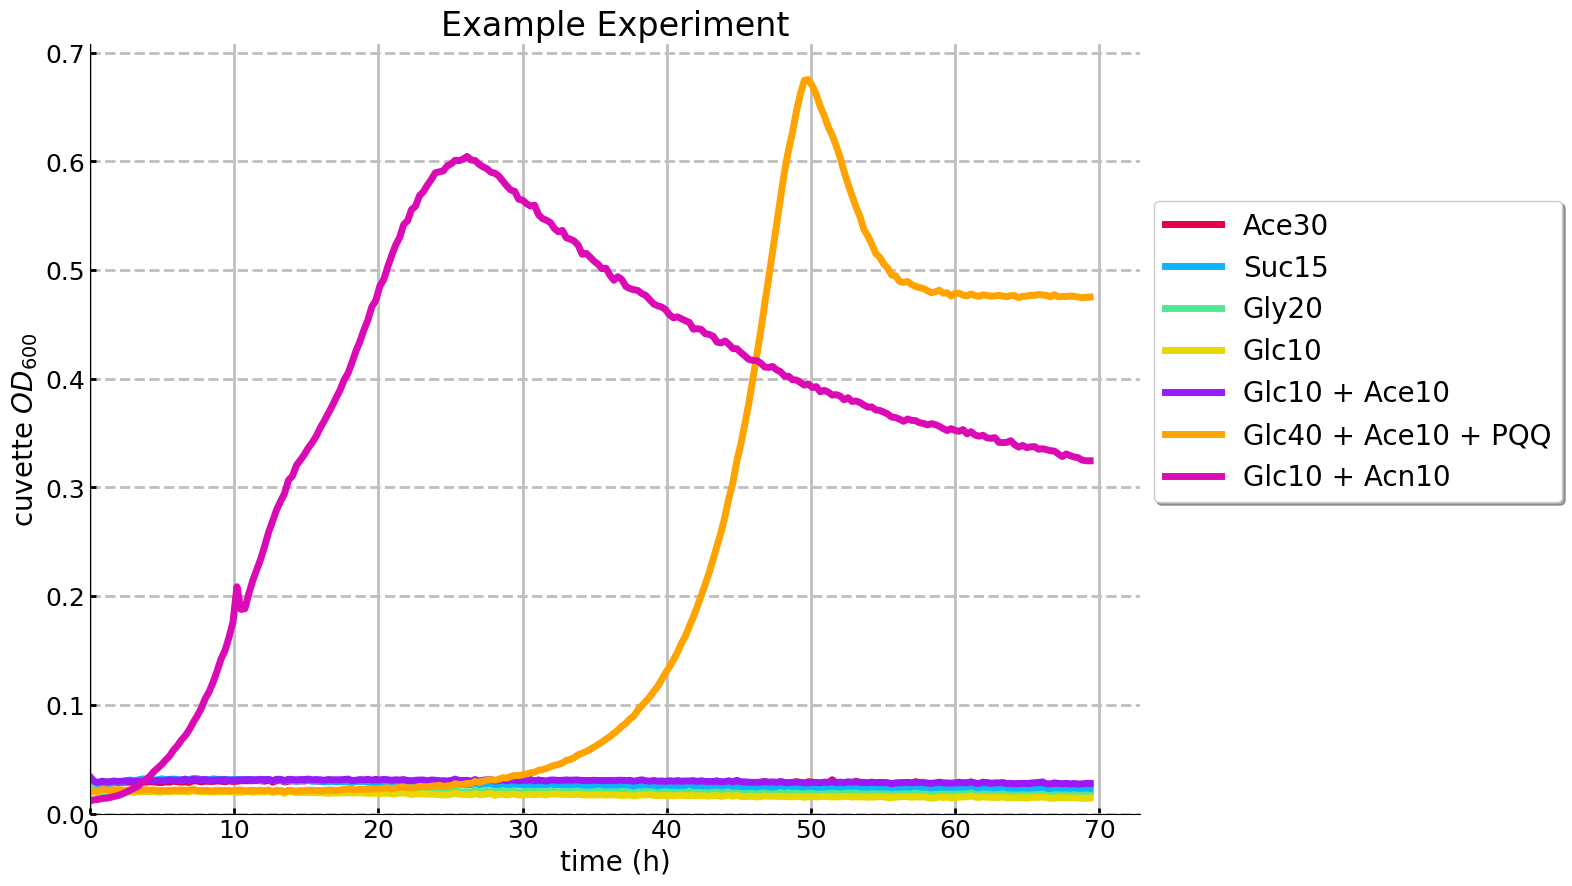

In [6]:
run_plotting_pipeline(
    plot_title="Example Experiment",
    path_to_raw_data="data/example.xlsx",
    path_to_plate_layout="plate_layout_example.json",
    strains=["MiniKat #1"],
    conditions=["all"],
    media=["MX"],
    groupby="condition",
)